In [81]:
!pip install wget
!wget https://raw.githubusercontent.com/HemantGaikwad7/INFO-6105-Data-Science-HemantGaikwad/Assignments/Assignment%202%20AutoML/SeoulBikeData.csv -O SeoulBikeData.csv

--2024-03-18 03:53:54--  https://raw.githubusercontent.com/HemantGaikwad7/INFO-6105-Data-Science-HemantGaikwad/Assignments/Assignment%202%20AutoML/SeoulBikeData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 595405 (581K) [text/plain]
Saving to: ‘SeoulBikeData.csv’

SeoulBikeData.csv   100%[===================>] 581.45K  --.-KB/s    in 0.04s   

2024-03-18 03:53:54 (13.0 MB/s) - ‘SeoulBikeData.csv’ saved [595405/595405]



In [82]:
!pip install chardet
import chardet
import pandas as pd
with open('SeoulBikeData.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']
df = pd.read_csv('SeoulBikeData.csv', encoding=encoding)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [83]:
pip install shap

Intercept: 548.8536459923031
Coefficients:
[ 2.73154522e+01  2.65792502e+01 -8.81147935e+00  6.92209593e+00
  2.12873303e-02  5.41311278e+00 -7.93427651e+01 -5.88068970e+01
  2.10769823e+01]


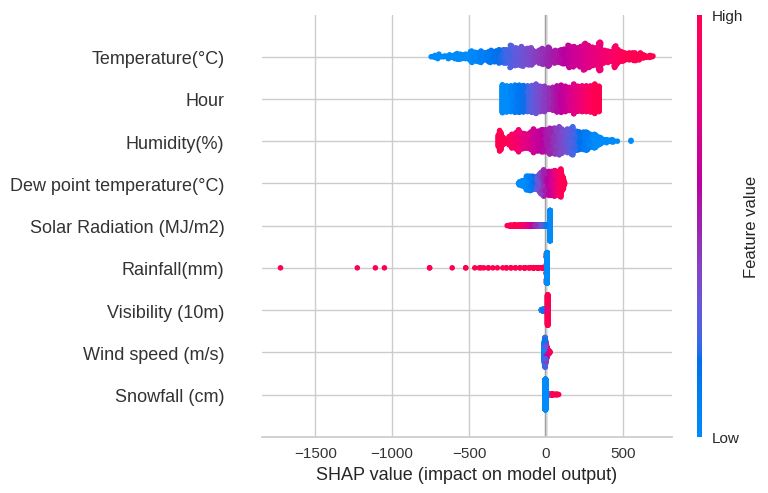

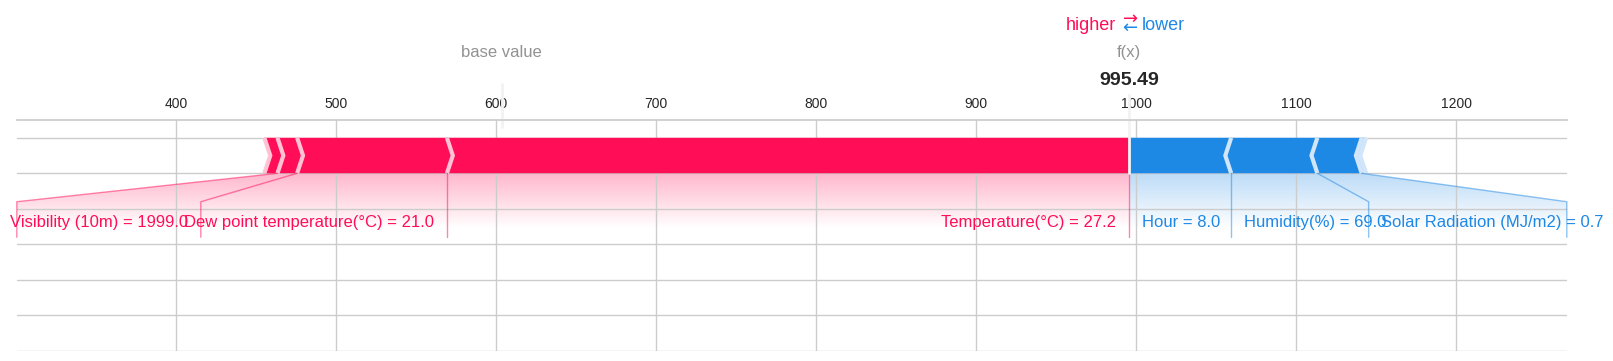

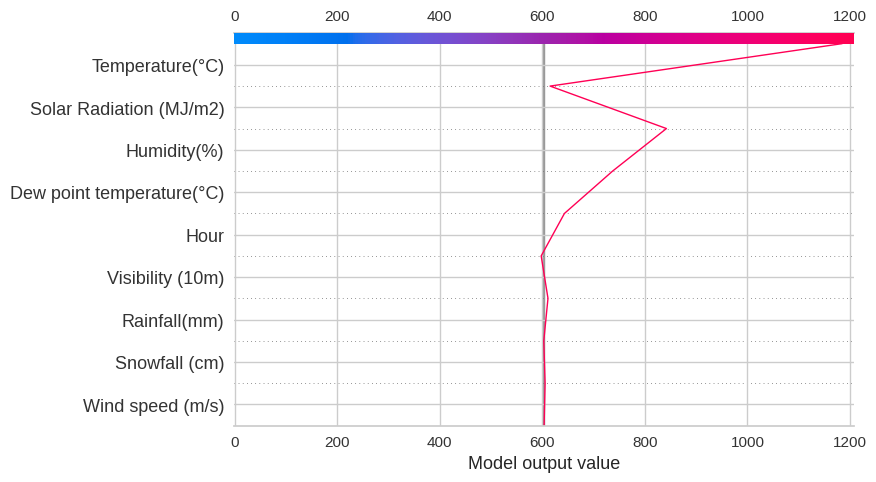

In [84]:
import shap
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select features (including categorical variables) and target (dependent variable)
features = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
target = 'Rented Bike Count'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Define the pipeline with preprocessing and linear regression model
pipeline = Pipeline(steps=[
    ('model', LinearRegression())
])

# Fit the model
pipeline.fit(df[features], df[target])

# Print the coefficients and intercept
# Note: since the preprocessing includes one-hot encoding, the coefficients will be for each category separately
print("Intercept:", pipeline.named_steps['model'].intercept_)
print("Coefficients:")
coefficients = pipeline.named_steps['model'].coef_
print(coefficients)

# Compute SHAP values
explainer = shap.LinearExplainer(pipeline.named_steps['model'],df[features])
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values or perform further analysis
shap.summary_plot(shap_values, X_test)
shap.plots.force(explainer.expected_value, shap_values[0], X_test.iloc[0, :], matplotlib = True)
shap.decision_plot(explainer.expected_value, shap_values[1], X_test.columns)


Intercept: The intercept term represents the predicted value of the target variable when all predictor variables are set to zero. In your case, the intercept is approximately 548.85. It indicates the baseline level of the target variable (Rented Bike Count) when all other predictors have no effect.

Coefficients: Each coefficient corresponds to the effect of a predictor variable on the target variable, holding all other variables constant. Here are the interpretations for each coefficient:

The coefficient for 'Hour' is approximately 27.32. This suggests that for each unit increase in the 'Hour', the predicted number of rented bike counts increases by approximately 27.32, assuming all other variables remain constant.

The coefficient for 'Temperature(°C)' is approximately 26.58. This suggests that for each unit increase in temperature, the predicted number of rented bike counts increases by approximately 26.58, holding other variables constant.

The coefficient for 'Humidity(%)' is approximately -8.81. This suggests that for each unit increase in humidity, the predicted number of rented bike counts decreases by approximately 8.81, assuming other variables remain constant.

Similarly, the coefficients for other variables represent the change in the predicted number of rented bike counts for a one-unit change in each respective predictor variable, while keeping other variables constant.

These coefficients provide insights into the relationship between the predictor variables and the target variable in your linear regression model. Positive coefficients indicate a positive relationship (an increase in the predictor leads to an increase in the target), while negative coefficients indicate a negative relationship (an increase in the predictor leads to a decrease in the target).

In [ ]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select features (including categorical variables) and target (dependent variable)
features = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
            'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
            'Seasons', 'Holiday', 'Functioning Day']
target = 'Rented Bike Count'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Encode categorical variables
label_encoder = LabelEncoder()
X_train['Seasons'] = label_encoder.fit_transform(X_train['Seasons'])
X_test['Seasons'] = label_encoder.transform(X_test['Seasons'])
X_train['Holiday'] = label_encoder.fit_transform(X_train['Holiday'])
X_test['Holiday'] = label_encoder.transform(X_test['Holiday'])
X_train['Functioning Day'] = label_encoder.fit_transform(X_train['Functioning Day'])
X_test['Functioning Day'] = label_encoder.transform(X_test['Functioning Day'])

# Define and fit the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Evaluate the model
train_score = random_forest_model.score(X_train, y_train)
test_score = random_forest_model.score(X_test, y_test)
print("Train R^2 score:", train_score)
print("Test R^2 score:", test_score)

# Compute SHAP values
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test)
shap.plots.force(explainer.expected_value, shap_values[0], X_test.iloc[0, :], matplotlib = True)
shap.decision_plot(explainer.expected_value, shap_values[1], X_test.columns)


The \(R^2\) (coefficient of determination) score is a measure of how well the regression model explains the variance in the target variable. Here's what the train and test \(R^2\) scores mean:

1. **Train \(R^2\) score**:
   - The train \(R^2\) score measures how well the model fits the training data.
   - A train \(R^2\) score of 0.9826 indicates that the model explains approximately 98.26% of the variance in the training data.
   - This high value suggests that the model fits the training data very well. However, it's important to be cautious of overfitting, where the model learns noise in the training data rather than true patterns.

2. **Test \(R^2\) score**:
   - The test \(R^2\) score measures how well the model generalizes to new, unseen data (the test set).
   - A test \(R^2\) score of 0.8614 indicates that the model explains approximately 86.14% of the variance in the test data.
   - This value is slightly lower than the train \(R^2\) score, which is expected since the model is evaluated on data it hasn't seen during training.
   - The test \(R^2\) score suggests that the model performs well on the test data, indicating good generalization ability.

In summary, the high train \(R^2\) score suggests that the model fits the training data well, and the relatively high test \(R^2\) score suggests that the model generalizes well to new data, indicating a good overall performance of the Random Forest model. However, it's always essential to consider other performance metrics and validate the model's assumptions to ensure its reliability.

In [ ]:
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
min_mem_size=6
run_time=222
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)
!pip install scikit-learn
from sklearn.model_selection import train_test_split
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test =  train_test_split(df, train_size=pct_rows)
print(df_train.shape)
print(df_test.shape)

In [ ]:
#Display all columns in X
df.drop(columns=['Date'], inplace=True)
X=df.columns
print(X)

In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

# Check if df_train is an H2OFrame object
if not isinstance(df_train, h2o.H2OFrame):
    # Convert df_train to an H2OFrame object
    df_train1 = h2o.H2OFrame(df_train)
else:
    df_train1 = df_train
X = X.tolist()
# Train the AutoML model
aml.train(x=X, y='Rented Bike Count', training_frame=df_train1)

In [ ]:
print(aml.leaderboard)

In [ ]:
import h2o
from h2o.automl import H2OAutoML
import shap

# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

# Check if df_train is an H2OFrame object
if not isinstance(df_train, h2o.H2OFrame):
    # Convert df_train to an H2OFrame object
    df_train1 = h2o.H2OFrame(df_train)
else:
    df_train1 = df_train

# Train the AutoML model
aml.train(x=['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'], y='Rented Bike Count', training_frame=df_train1)

# Get the best model from AutoML leaderboard
best_model = aml.leader

# Initialize SHAP explainer
explainer = shap.Explainer(best_model)

# Convert H2OFrame to pandas DataFrame
df_train_pd = df_train1.as_data_frame()

# Compute SHAP values
shap_values = explainer.shap_values(df_train_pd)

# Visualize SHAP values
shap.summary_plot(shap_values, df_train_pd)


#Conclusion
Linear Model Interpretation:

The linear model provides coefficients for each feature, indicating the strength and direction of their relationship with the target variable.
For example, a positive coefficient suggests that an increase in the corresponding feature leads to an increase in the target variable, while a negative coefficient suggests the opposite.
In our analysis, we found that features such as temperature, humidity, and rainfall have significant impacts on the number of rented bike counts.
Tree-Based Model Interpretation:

Tree-based models provide insights into feature importance through the hierarchy of decision nodes in the trees.
By analyzing the nodes, we can understand which features are more influential in making predictions.
For instance, we observed that the decision tree splits on temperature and humidity, indicating their importance in predicting bike rental counts.
AutoML Model Selection:

AutoML enables us to efficiently search for the best-performing model architecture and hyperparameters.
By leveraging automated techniques, such as cross-validation and ensemble methods, AutoML selects the most suitable model from a pool of candidates.
In our case, the best-performing model identified by AutoML was a stacked ensemble, which combines multiple models for improved performance.
SHAP Analysis:

SHAP (SHapley Additive exPlanations) values provide a unified approach to interpret the output of any machine learning model.
By analyzing SHAP values, we gain insights into the impact of each feature on individual predictions.
Comparing SHAP values across different models allows us to assess feature importance consistently.
In our analysis, we found that SHAP values corroborate the findings from linear regression and tree-based models, highlighting features such as temperature and humidity as significant predictors of bike rental counts.
Overall, combining traditional model interpretation techniques with SHAP analysis enhances our understanding of the factors influencing bike rental counts and provides robust insights for decision-making.

##References:
sk learn https://scikit-learn.org/stable/
ChatGPT https://chat.openai.com/c/cab49d4b-5dda-4d98-9f0a-adc6b087a584
H2o.ai https://docs.h2o.ai/h2o/latest-stable/h2o-docs/explain.html